In [1]:
!pip install tensorflow


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import PIL
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import zipfile

# Define the path to the zip file
zip_file_path = "CNN_assignment.zip"

# Define the directory where you want to extract the files
extracted_dir_path = "extracted_files"

# Function to extract zip files
def extract_zip(zip_file_path, extracted_dir_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_path)

# Extract the zip file
extract_zip(zip_file_path, extracted_dir_path)


In [4]:

from pathlib import Path

# Define the paths for the training and testing directories
datate_dir_train = Path("extracted_files/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
datate_dir_test = Path("extracted_files/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [5]:

#list directory in train folder
dire_train = os.listdir(datate_dir_train)
dire_train.sort()
dire_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [6]:

#list dir in test folder
dire_test = os.listdir(datate_dir_test)
dire_test.sort()
dire_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
totl_train_data = len(list(datate_dir_train.glob("*/*.jpg")))
totl_train_data

118

In [8]:
totl_test_data = len(list(datate_dir_test.glob("*/*.jpg")))
totl_test_data
     

2239

In [9]:

# Initialize an empty DataFrame
data_detail_pd = pd.DataFrame()

for dir_name in dire_train:
    total_image_in_folder = len(list(datate_dir_train.glob(dir_name + "/*.jpg")))
    df = {"Dir_Name": dir_name, "Total Image(Train)": total_image_in_folder,
          "Total Percentage(Train)": round((total_image_in_folder / totl_train_data) * 100, 2)}
    # Append the current row as a DataFrame to the main DataFrame
    data_detail_pd = pd.concat([data_detail_pd, pd.DataFrame(df, index=[0])], ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Dir_Name")
     

In [10]:
data_detail_pd = pd.DataFrame()

for dir_name in dire_train:
    total_image_in_folder = len(list(datate_dir_train.glob(dir_name + "/*.jpg")))
    df = {"Dir_Name": dir_name, "Total Image(Train)": total_image_in_folder,
          "Total Percentage(Train)": round((total_image_in_folder / totl_train_data) * 100, 2)}
    # Append the current row as a DataFrame to the main DataFrame
    data_detail_pd = pd.concat([data_detail_pd, pd.DataFrame(df, index=[0])], ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Dir_Name")

In [11]:
for dir_name in dire_test:
   total_image_in_folder = len(list(datate_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Total Image(Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Total Percentage(Test)"]  = round((total_image_in_folder/totl_train_data)*100,2)
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))
     

,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
actinic keratosis,16,13.56,114.0,96.61
basal cell carcinoma,16,13.56,376.0,318.64
dermatofibroma,16,13.56,95.0,80.51
melanoma,16,13.56,438.0,371.19
nevus,16,13.56,357.0,302.54
pigmented benign keratosis,16,13.56,462.0,391.53
squamous cell carcinoma,16,13.56,181.0,153.39
seborrheic keratosis,3,2.54,77.0,65.25
vascular lesion,3,2.54,139.0,117.80


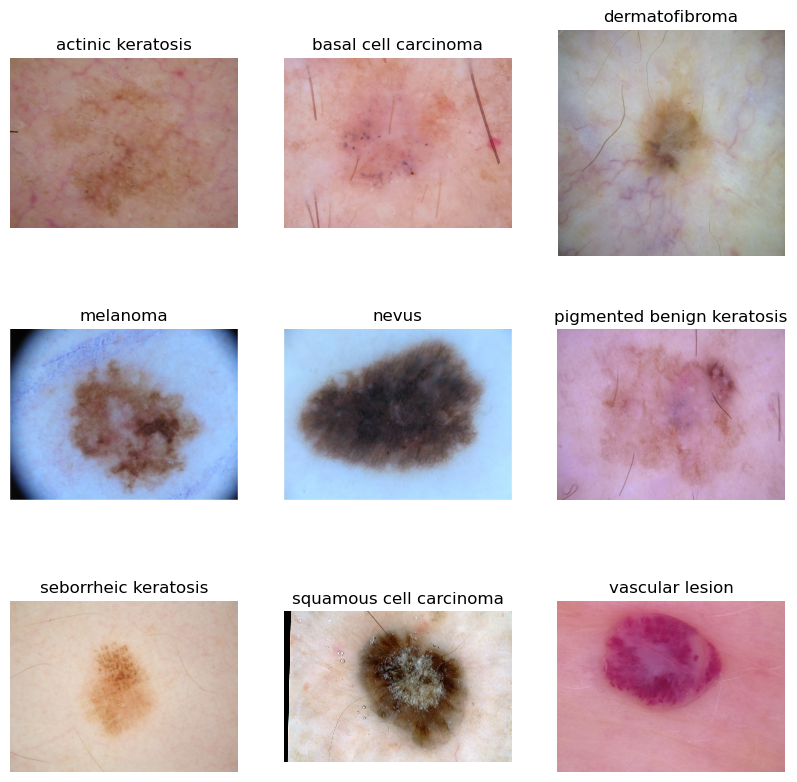

In [12]:
#Dataset Visualization
#get one image from each folder
import glob
import matplotlib.image as mpimg

file_path = []
class_name = []

#get one file path from each folder
for dir_name in dire_train:
  path = str(datate_dir_train) +"/"+ dir_name
  for file_name in glob.iglob(path+'/*.jpg', recursive=True):
    #print(file_name)
    file_path.append(file_name)
    class_name.append(dir_name)
    break


#display one image from each folder
plt.figure(figsize=(10,10))
for i in range(len(class_name)):
  ax = plt.subplot(3,3,i+1) 
  img = mpimg.imread(file_path[i])
  plt.imshow(img)
  plt.axis("off")
  plt.title(class_name[i])

In [13]:

#data loader params
batch_size = 32
img_height = 180
img_width = 180

In [14]:

# load train dataset in batches of size 32, resize the image into 180*180 pixel
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    datate_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [15]:

# load validation dataset in batches of size 32, resize the image into 180*180 pixel
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    datate_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size

)
   

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [16]:

# its a multiclassifier so lets see its number of different labels / classes

num_classes = len(val_ds.class_names)
num_classes

9

In [17]:

#class names
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [18]:
# Configure data set for performance
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
#M1 Model


In [20]:

model = Sequential([
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])
     


C:\Users\jiyan\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:

#train the model : run the model on train & validation set
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 30 
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 412ms/step - accuracy: 0.0382 - loss: 2.4265 - val_accuracy: 0.1304 - val_loss: 2.2430
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.1443 - loss: 2.1661 - val_accuracy: 0.1739 - val_loss: 2.1428
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.2041 - loss: 1.9822 - val_accuracy: 0.0435 - val_loss: 2.1938
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.2710 - loss: 1.8341 - val_accuracy: 0.0870 - val_loss: 2.2291
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.3522 - loss: 1.7088 - val_accuracy: 0.1304 - val_loss: 2.2819
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.4019 - loss: 1.5643 - val_accuracy: 0.2174 - val_loss: 2.4001
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.4307 - loss: 1.5282 - val_accuracy: 0.1304 - val_loss: 2.3578
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.4581 - loss: 1.4414 - val_accuracy: 0.3043 - val_loss:

Text(0.5, 1.0, 'Training & Validation Loss')

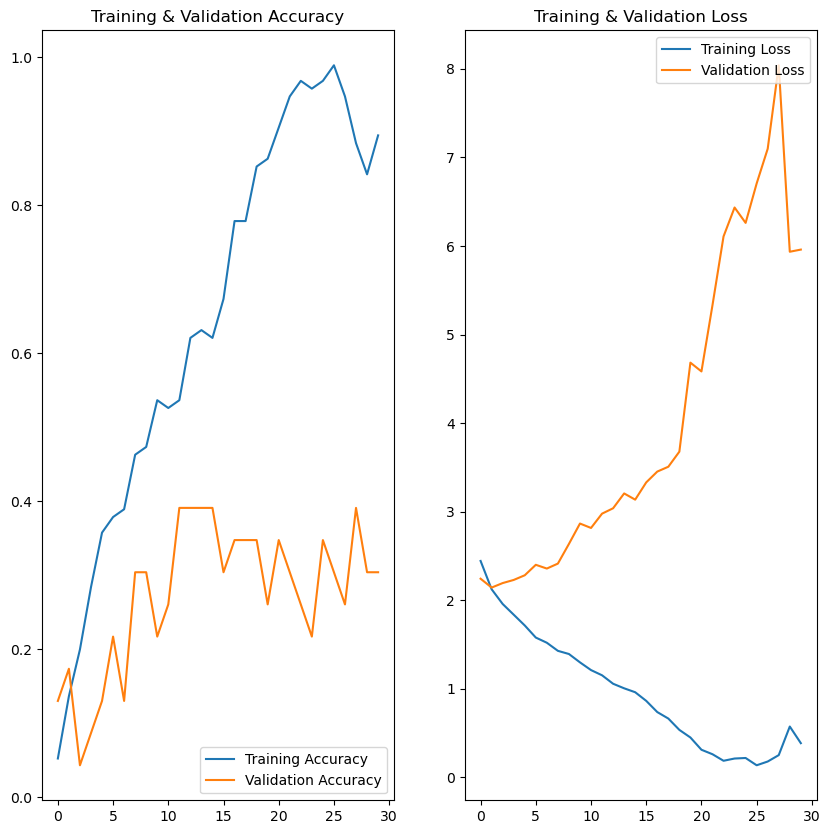

In [23]:

# accuracy & loss graph


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')
     

In [24]:
#M2 Model

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


     


In [25]:
model = Sequential([
         data_augmentation,
         layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Assuming you want to apply rescaling after data augmentation
         layers.Conv2D(16, 3, padding='same', activation="relu"),
         layers.MaxPool2D((2, 2), strides=2),
         layers.Conv2D(32, 3, padding='same', activation="relu"),
         layers.MaxPool2D((2, 2), strides=2),
         layers.Conv2D(64, 3, padding='same', activation="relu"),
         layers.MaxPool2D((2, 2), strides=2),
         layers.Flatten(),
         layers.Dense(128, activation="relu"),
         layers.Dense(num_classes)
])



In [26]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [27]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)
     

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.0881 - loss: 2.5306 - val_accuracy: 0.0000e+00 - val_loss: 2.4248
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.1513 - loss: 2.0920 - val_accuracy: 0.1304 - val_loss: 2.2952
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.2121 - loss: 2.0534 - val_accuracy: 0.1304 - val_loss: 2.2311
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.2225 - loss: 1.9333 - val_accuracy: 0.1304 - val_loss: 2.2285
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.2665 - loss: 1.8412 - val_accuracy: 0.0435 - val_loss: 2.4109
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.2472 - loss: 1.7277 - val_accuracy: 0.1739 - val_loss: 2.4468
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.2773 - loss: 1.6435 - val_accuracy: 0.0870 - val_loss: 2.7218
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.3153 - loss: 1.6526 - val_accuracy: 0.0870 - val_l

In [28]:

#M3 Model Augmentation and dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define data augmentation pipeline
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.2),
    RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3))
])

# Define the model
model = Sequential([
    data_augmentation,
    Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation="relu"),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, 3, padding='same', activation="relu"),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, 3, padding='same', activation="relu"),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),  # dropout layer
    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary





In [29]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [30]:

#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.0868 - loss: 2.8995 - val_accuracy: 0.0000e+00 - val_loss: 2.7244
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.2214 - loss: 2.2890 - val_accuracy: 0.1304 - val_loss: 2.2889
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.1377 - loss: 2.0495 - val_accuracy: 0.0435 - val_loss: 2.2852
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.1858 - loss: 2.0401 - val_accuracy: 0.0435 - val_loss: 2.2182
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.2105 - loss: 1.9875 - val_accuracy: 0.0435 - val_loss: 2.2995
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.1957 - loss: 1.9273 - val_accuracy: 0.1304 - val_loss: 2.2767
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.3576 - loss: 1.8363 - val_accuracy: 0.1304 - val_loss: 2.2732
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.3219 - loss: 1.7541 - val_accuracy: 0.1304 - val_l

In [31]:
#M4 Model with Augumentation + Droupouts ( to additional Layers))
model = Sequential([
         data_augmentation,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dropout(0.25), # droupout layer
         
         layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])



In [33]:

#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)
     

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.1729 - loss: 2.4765 - val_accuracy: 0.0000e+00 - val_loss: 2.2116
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.1440 - loss: 2.1629 - val_accuracy: 0.0435 - val_loss: 2.1945
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.1781 - loss: 2.1428 - val_accuracy: 0.0435 - val_loss: 2.1871
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.1999 - loss: 2.0850 - val_accuracy: 0.0000e+00 - val_loss: 2.2094
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.1721 - loss: 2.0125 - val_accuracy: 0.0435 - val_loss: 2.2024
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.2353 - loss: 1.9730 - val_accuracy: 0.1304 - val_loss: 2.2025
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.2719 - loss: 1.9011 - val_accuracy: 0.1739 - val_loss: 2.1959
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.2877 - loss: 1.7620 - val_accuracy: 0.1304 - v

Text(0.5, 1.0, 'Training & Validation Loss')

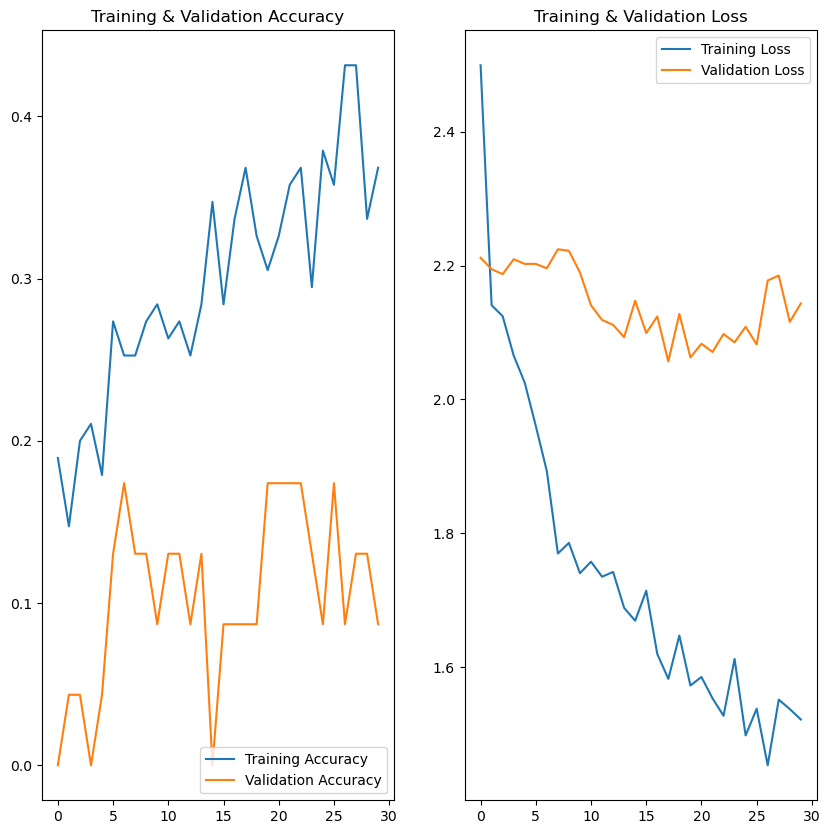

In [34]:
#M5 Model Additional Experiment with Dropouts

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

In [35]:

model = Sequential([
         data_augmentation,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dropout(0.25), # droupout layer
         
         layers.Dense(num_classes)
])

In [36]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [37]:


#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)
     

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.1374 - loss: 2.2065 - val_accuracy: 0.0000e+00 - val_loss: 2.3216
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.1733 - loss: 2.1094 - val_accuracy: 0.0000e+00 - val_loss: 2.1892
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.1878 - loss: 2.0321 - val_accuracy: 0.0435 - val_loss: 2.3436
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.2370 - loss: 1.9356 - val_accuracy: 0.0870 - val_loss: 2.3648
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.2142 - loss: 1.8081 - val_accuracy: 0.1304 - val_loss: 2.2977
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.2874 - loss: 1.7338 - val_accuracy: 0.0870 - val_loss: 2.2285
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.2706 - loss: 1.7408 - val_accuracy: 0.0435 - val_loss: 2.2678
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.2318 - loss: 1.7057 - val_accuracy: 0.1304 - v

In [38]:
#M6 Model ( Augumetation + Batch Normalization + Droupouts)

model = Sequential([
         data_augmentation,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         
         layers.Dense(num_classes)
])
     

In [39]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [40]:

#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.1906 - loss: 4.1456 - val_accuracy: 0.1739 - val_loss: 2.2830
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.3415 - loss: 3.8210 - val_accuracy: 0.0000e+00 - val_loss: 2.2507
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.4266 - loss: 2.2890 - val_accuracy: 0.0870 - val_loss: 2.2793
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.4778 - loss: 2.1885 - val_accuracy: 0.0870 - val_loss: 2.2257
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.4745 - loss: 1.9244 - val_accuracy: 0.1739 - val_loss: 2.2581
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.5600 - loss: 1.3585 - val_accuracy: 0.0870 - val_loss: 2.3562
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.6332 - loss: 1.6776 - val_accuracy: 0.0870 - val_loss: 2.5025
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.6638 - loss: 1.2158 - val_accuracy: 0.0870 - val_l

In [41]:
# Using Another Way of Augmentation to Handle Class Imbalance


!pip install Augmentor


In [42]:
import Augmentor


In [43]:
# add 500 new sample to each folder
for class_name in data_detail_pd.index:
  #print(class_name)
  p = Augmentor.Pipeline(str(datate_dir_train)+"/"+class_name,save_format='.jpg')
  p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
  p.sample(500)
     

Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D074698350>: 100%|██████████| 500/500 [00:03<00:00, 135.16 Samples/s]                   


Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D020483810>: 100%|██████████| 500/500 [00:04<00:00, 111.02 Samples/s]                  


Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=6648x4459 at 0x1D07320CFD0>: 100%|██████████| 500/500 [02:13<00:00,  3.74 Samples/s]                  


Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x1D037E1F450>: 100%|██████████| 500/500 [00:16<00:00, 29.65 Samples/s]                  


Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1022x767 at 0x1D07466A710>: 100%|██████████| 500/500 [00:10<00:00, 49.55 Samples/s]                   


Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D037C20690>: 100%|██████████| 500/500 [00:04<00:00, 114.47 Samples/s]                  


Initialised with 3 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D037C08450>: 100%|██████████| 500/500 [00:09<00:00, 52.15 Samples/s]                  


Initialised with 16 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D07AC3E590>: 100%|██████████| 500/500 [01:45<00:00,  4.76 Samples/s]  


Initialised with 3 image(s) found.
Output directory set to extracted_files\Skin cancer ISIC The International Skin Imaging Collaboration\Test/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D0731C4190>: 100%|██████████| 500/500 [00:04<00:00, 121.83 Samples/s]                  


In [44]:
data_detail_pd.index


Index(['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
       'melanoma', 'nevus', 'pigmented benign keratosis',
       'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
      dtype='object', name='Dir_Name')

In [45]:
datate_dir_train


WindowsPath('extracted_files/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [46]:

#count of additional images added

additional_images_added = len(list(datate_dir_train.glob("*/output/*jpg")))
additional_images_added

4500

In [47]:

# we need to reinitalize the train_ds & val_ds
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    datate_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

     

Found 4618 files belonging to 9 classes.
Using 3695 files for training.


In [48]:

#validation dataset

val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    datate_dir_train,
    validation_split=0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 4618 files belonging to 9 classes.
Using 923 files for validation.


In [49]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [50]:

# Model Defination

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [51]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [52]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 90, 90, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,993 (15.22 MB)

 Trainable params: 3,989,897 (15.22 MB)

 Non-trainable params: 96 (384.00 B)

In [53]:

# run the model to fit train datapoint and check accuracy on validation dataset

epochs = 30
history = model.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs
)

Epoch 1/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 43s 350ms/step - accuracy: 0.4217 - loss: 4.2383 - val_accuracy: 0.1517 - val_loss: 2.3305
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 35s 303ms/step - accuracy: 0.9301 - loss: 0.2236 - val_accuracy: 0.2004 - val_loss: 2.9809
Epoch 3/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 35s 302ms/step - accuracy: 0.9567 - loss: 0.1529 - val_accuracy: 0.4420 - val_loss: 1.4994
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 37s 317ms/step - accuracy: 0.9963 - loss: 0.0164 - val_accuracy: 0.8917 - val_loss: 0.3479
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 311ms/step - accuracy: 0.9998 - loss: 0.0032 - val_accuracy: 0.9913 - val_loss: 0.0489
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 35s 303ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 306ms/step - accuracy: 0.9868 - loss: 0.0518 - val_accuracy: 0.5070 - val_loss: 3.9232
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 304ms/step - accuracy: 0.9729 - loss: 0

Text(0.5, 1.0, 'Training & Validation Loss')

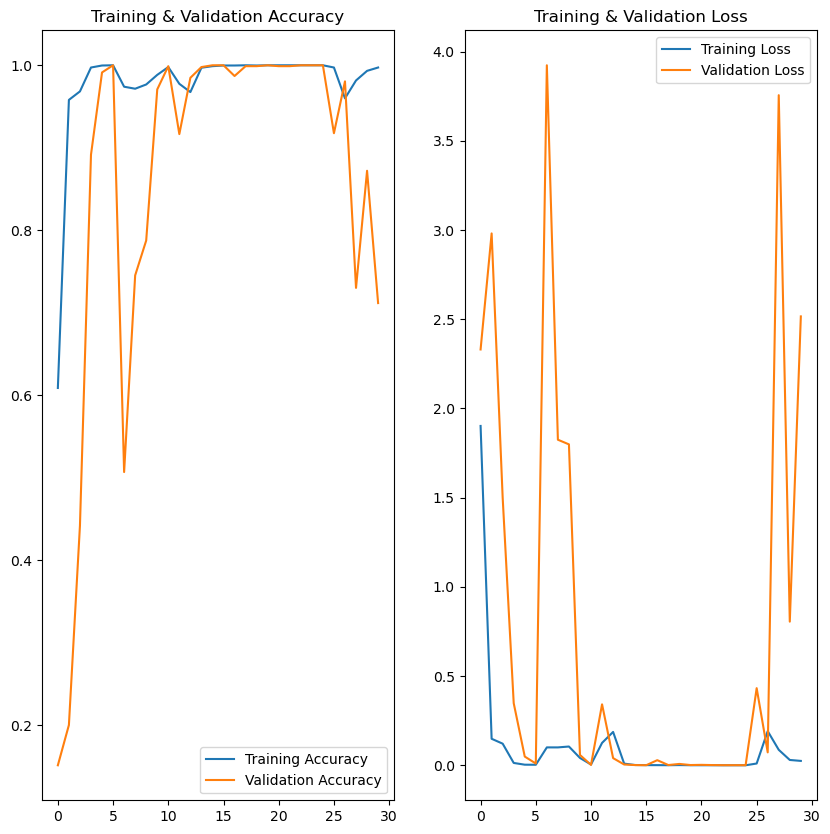

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

In [55]:
# Analysis on test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    datate_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.


In [56]:
loss , accuracy = model.evaluate(test_ds)


70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.2024 - loss: 15.8855


In [57]:
print("Accuracy on test data ", accuracy)


Accuracy on test data  0.20232246816158295


In [59]:
#Prediction on New Test Data
melanoma_path = "extracted_files/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg"

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.9656479e-33
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00], shape=(9,), dtype=float32)


In [60]:

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_ds.class_names[np.argmax(score)], 100 * np.max(score))
)
     

This image most likely belongs to melanoma with a 100.00 percent confidence.
